# Exploratory Data Analysis


This notebook aims to explore the several csv files of the MSOAC placebo dataset. We will analyse the data and try to find patterns. The csv files that will be explored in this notebook are:
- dm.csv (Demographics)	
- ce.csv (Clinical Events)
- ds.csv (Disposition)
- mh.csv (Medical History)
- rp.csv (Reproductive System Findings)
- sm.csv (Subject Disease Milestones)

**DISCLAIMER**: Not all SDTM variables were used in the standardization process. If a variable is completely blank, there is not data for that variable. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import sys

def visual_progress_bar(percentage):
    """
    Display a simple visual progress bar based on the specified percentage.

    Parameters:
    - percentage: Percentage of completion (float)
    """
    length = 20  # Adjust the length of the progress bar as needed
    progress = int(length * percentage / 100)
    bar = '[' + '#' * progress + '-' * (length - progress) + ']'
    sys.stdout.write(f'\r{bar} {percentage}%')
    sys.stdout.flush()

### 1. Demographics data (dm.csv) [one record per subject]

In [2]:
# Load demographics .csv
file_path = 'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files/dm.csv'

# create data frame
demographics = pd.read_csv(file_path)
demographics

,STUDYID,DOMAIN,USUBJID,SUBJID,RFSTDTC,RFENDTC,DTHDTC,DTHFL,SITEID,INVID,...,ARM,ACTARMCD,ACTARM,COUNTRY,DMDTC,DMDY,DMENDY,DMDTC_TS,RFENDTC_TS,RFSTDTC_TS
0,MSOAC,DM,MSOAC/0649,649,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC,DM,MSOAC/2224,2224,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,SRB,NaN,NaN,NaN,NaN,NaN,NaN
2,MSOAC,DM,MSOAC/0576,576,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSOAC,DM,MSOAC/4961,4961,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSOAC,DM,MSOAC/5990,5990,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,MSOAC,DM,MSOAC/2501,2501,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,1.0,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461,MSOAC,DM,MSOAC/8672,8672,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,MSOAC,DM,MSOAC/5705,5705,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,MSOAC,DM,MSOAC/8255,8255,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
unique_count = demographics['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}") #all patients in the dataset

Number of (unique) patients in this dataset is: 2465


Check how many missing values we have per column

In [50]:
missing_percentage = (demographics.isnull().sum() / len(demographics)) * 100
missing_demographics = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_demographics)

   Column Name  Missing Percentage
0      STUDYID            0.000000
1       DOMAIN            0.000000
2      USUBJID            0.000000
3       SUBJID            0.000000
4      RFSTDTC          100.000000
5      RFENDTC          100.000000
6       DTHDTC          100.000000
7        DTHFL          100.000000
8       SITEID          100.000000
9        INVID          100.000000
10      INVNAM          100.000000
11     BRTHDTC          100.000000
12         AGE            3.367140
13        AGEU            3.367140
14         SEX            0.000000
15        RACE           31.399594
16      ETHNIC           90.750507
17       ARMCD            0.000000
18         ARM            0.000000
19    ACTARMCD           87.626775
20      ACTARM           87.626775
21     COUNTRY           56.267748
22       DMDTC          100.000000
23        DMDY          100.000000
24      DMENDY          100.000000
25    DMDTC_TS          100.000000
26  RFENDTC_TS          100.000000
27  RFSTDTC_TS      

We will drop the columns with more than 85% missing values, namely:
- **STUDYID**: Study Identifier (irrelevant)
- **DOMAIN**: Domain Abbreviation (irrelevant)
- **SUBJID**: Subject Identifier for the Study (same as USUBJID)
- **RFSTDTC, RFENDTC, DTHDTC, DTHFL, SITEID, INVID, INVNAM, BRTHDTC, DMDTC, DMDY, DMENDY, DMDTC_TS, RFENDTC_TS, RFSTDTC_TS** (all missing and not even mentioned in the dictionary)
- **AGEU**: Age Units (NA when AGE missing or YEARS - irrelevant)
- **ACTARMCD**: Actual Arm Code (only NA or 1 - seems irrelevant)
- **ACTARM**: Description of Actual Arm (only NA or PLACEBO - seems irrelevant)
- **ARMCD**: Planned Arm Code (only 1 - irrelevant)
- **ARM**: Description of Planned Arm (only PLACEBO - irrelevant)


Columns that are being dropped, but not sure if we actually *should keep*:
- **ETHNIC**: Ethnicity (too many missing values) - HISPANIC OR LATINO or NOT HISPANIC OR LATINO

In [51]:
columns_to_drop = ['STUDYID','DOMAIN','SUBJID','RFSTDTC','RFENDTC','DTHDTC','DTHFL','SITEID','INVID','INVNAM','BRTHDTC','AGEU','ETHNIC','ARMCD','ARM','ACTARMCD','ACTARM','DMDTC','DMDY','DMENDY','DMDTC_TS','RFENDTC_TS','RFSTDTC_TS']
demographics = demographics.drop(columns_to_drop, axis=1)
demographics

,USUBJID,AGE,SEX,RACE,COUNTRY
0,MSOAC/0649,NaN,F,WHITE,USA
1,MSOAC/2224,38.0,F,WHITE,SRB
2,MSOAC/0576,50.0,F,WHITE,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN
...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN
2462,MSOAC/5705,30.0,M,NaN,NaN
2463,MSOAC/8255,42.0,M,NaN,NaN


- Descriptive statistics for continuous variables (in this case, just age)

In [5]:
continuous_columns = ['AGE']

descriptive_continuous = {
    'Count': demographics[continuous_columns].count(), #cases that are not missing
    'Missing Cases': demographics[continuous_columns].isna().sum(),
    'Mean': demographics[continuous_columns].mean(),
    'Standard Deviation': demographics[continuous_columns].std()
}

cont_demographics = pd.DataFrame(descriptive_continuous)

print(cont_demographics)

     Count  Missing Cases       Mean  Standard Deviation
AGE   2382             83  41.766583           10.413545


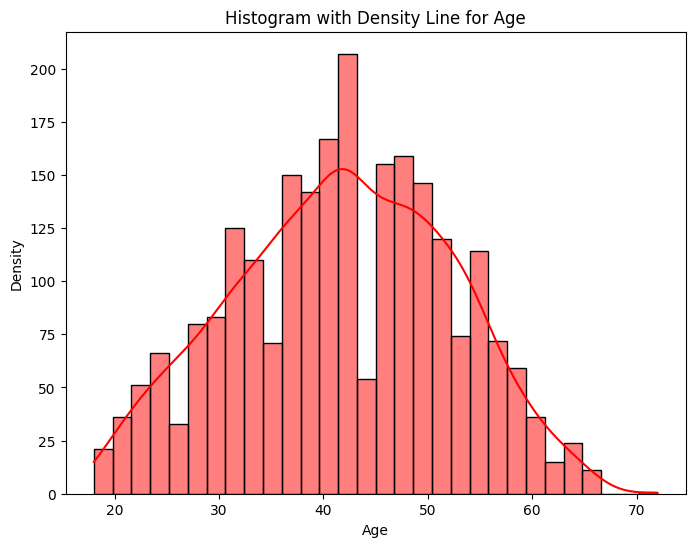

In [35]:
age = demographics['AGE'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(age, kde=True, color='red', bins=30)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram with Density Line for Age')
plt.show() # more or less normaly distributed

In [40]:
summary_stats = age.describe()
summary_stats

count    2382.000000
mean       41.766583
std        10.413545
min        18.000000
25%        34.000000
50%        42.000000
75%        50.000000
max        72.000000
Name: AGE, dtype: float64

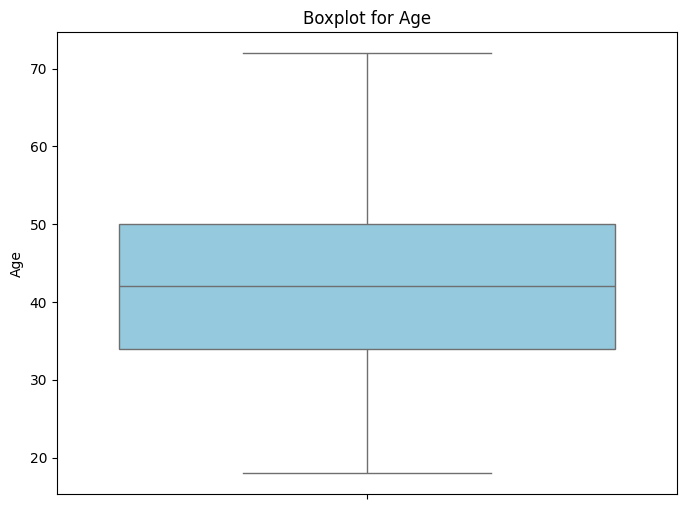

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=age, color='skyblue')
plt.ylabel('Age')
plt.title('Boxplot for Age')
plt.show()

- Descriptive statistics for categorical variables (in this case, gender, race and country)

In [6]:
categorical_columns = ['SEX', 'RACE','COUNTRY']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': demographics[col].count(),
        'Missing Cases': demographics[col].isna().sum(),
        'Unique Values': demographics[col].nunique(),
        'Mode': demographics[col].mode().values[0],
        'Mode Frequency': demographics[col].value_counts().max()
    }

cat_demographics = pd.DataFrame(descriptive_categorical).T
print(cat_demographics)

        Count Missing Cases Unique Values   Mode Mode Frequency
SEX      2465             0             2      F           1658
RACE     1691           774             7  WHITE           1534
COUNTRY  1078          1387            35    USA            249


- Number of observations for each RACE category

In [20]:
race_counts_demographics = demographics['RACE'].value_counts().reset_index()
race_counts_demographics.columns = ['Race', 'Count']
total_count = race_counts_demographics['Count'].sum()
race_counts_demographics['Percentage'] = (race_counts_demographics['Count'] / total_count) * 100

print(race_counts_demographics)

                               Race  Count  Percentage
0                             WHITE   1534   90.715553
1                             ASIAN     64    3.784743
2                             OTHER     41    2.424601
3         BLACK OR AFRICAN AMERICAN     39    2.306328
4                          HISPANIC     10    0.591366
5  AMERICAN INDIAN OR ALASKA NATIVE      2    0.118273
6                HISPANIC OR LATINO      1    0.059137


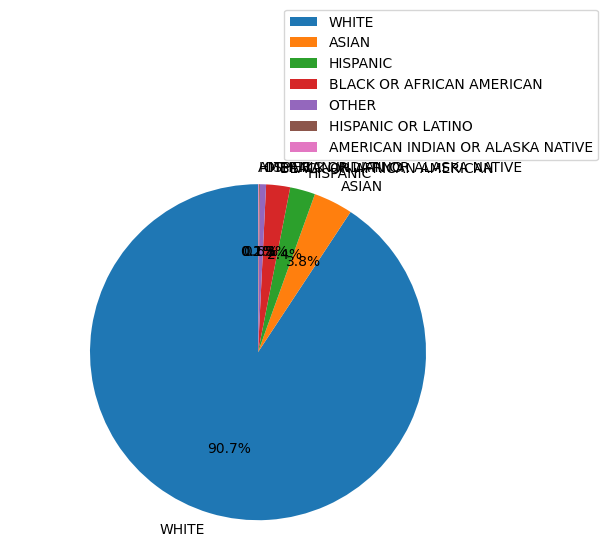

In [42]:
# Pie chart - dropped NA for now
categories = demographics['RACE'].dropna().unique()
category_counts = demographics['RACE'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

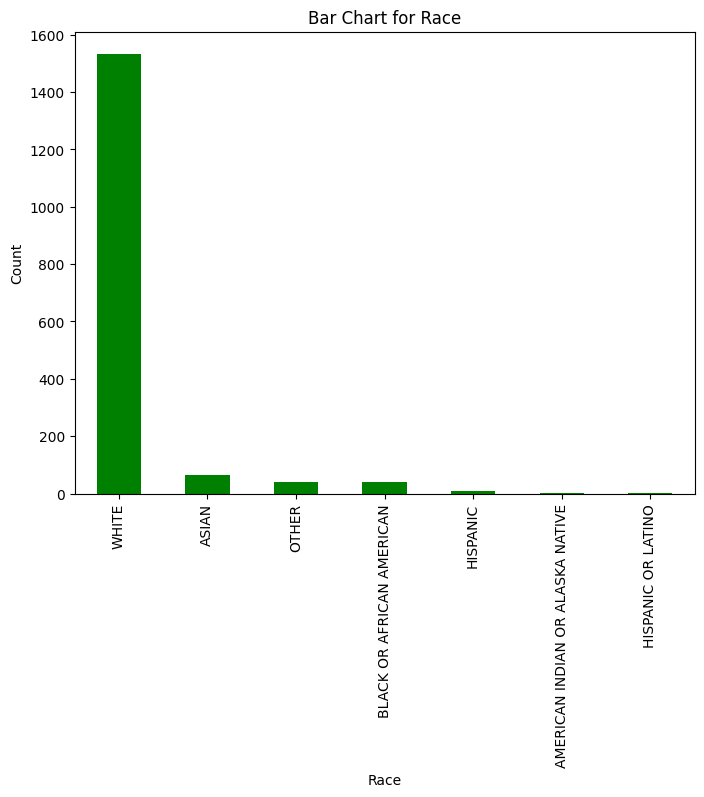

In [44]:
race = demographics['RACE'].dropna()

plt.figure(figsize=(8, 6))
race.value_counts().plot(kind='bar', color='green')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Bar Chart for Race')
plt.show()

- Number of observations for each SEX category

In [22]:
sex_counts_demographics = demographics['SEX'].value_counts().reset_index()
sex_counts_demographics.columns = ['Gender', 'Count']
total_count = sex_counts_demographics['Count'].sum()
sex_counts_demographics['Percentage'] = (sex_counts_demographics['Count'] / total_count) * 100

print(sex_counts_demographics)

  Gender  Count  Percentage
0      F   1658   67.261663
1      M    807   32.738337


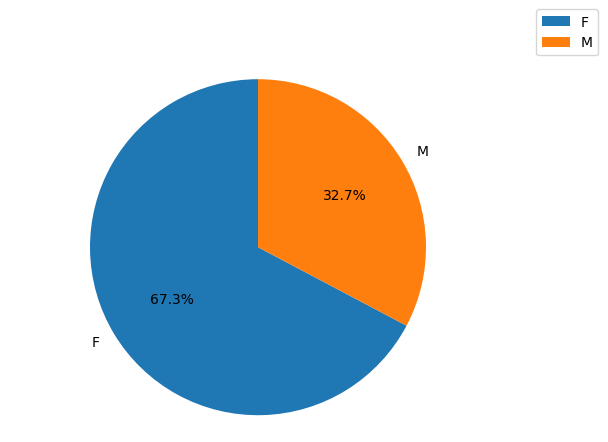

In [23]:
# Pie chart - dropped NA for now
categories = demographics['SEX'].dropna().unique()
category_counts = demographics['SEX'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

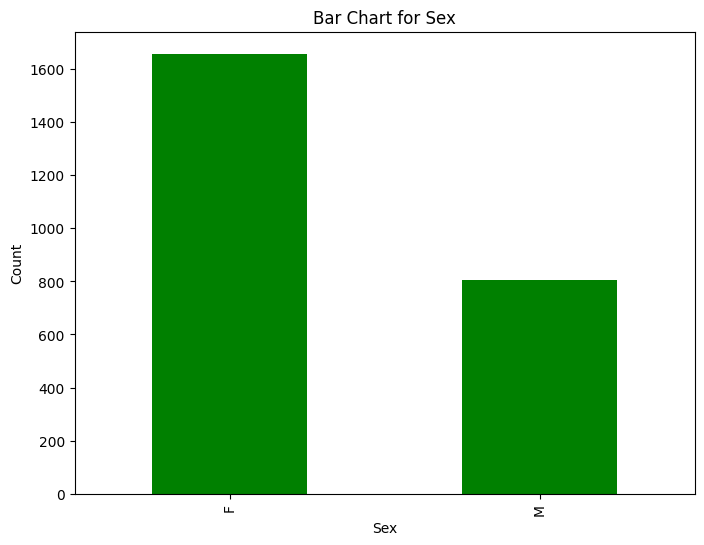

In [46]:
sex = demographics['SEX'].dropna()

plt.figure(figsize=(8, 6))
sex.value_counts().plot(kind='bar', color='green')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Chart for Sex')
plt.show()

- Number of observations for each COUNTRY category

In [24]:
country_counts_demographics = demographics['COUNTRY'].value_counts().reset_index()
country_counts_demographics.columns = ['Country', 'Count']
total_count = country_counts_demographics['Count'].sum()
country_counts_demographics['Percentage'] = (country_counts_demographics['Count'] / total_count) * 100

print(country_counts_demographics)

   Country  Count  Percentage
0      USA    249   23.098330
1      POL    177   16.419295
2      CAN     73    6.771800
3      UKR     63    5.844156
4      CZE     63    5.844156
5      IND     56    5.194805
6      RUS     48    4.452690
7      SRB     46    4.267161
8      DEU     44    4.081633
9      GBR     37    3.432282
10     NLD     26    2.411874
11     BGR     21    1.948052
12     HUN     19    1.762523
13     ROU     16    1.484230
14     GRC     14    1.298701
15     FRA     13    1.205937
16     NZL     10    0.927644
17     BEL     10    0.927644
18     SWE      9    0.834879
19     MEX      9    0.834879
20     EST      8    0.742115
21     ESP      7    0.649351
22     PER      7    0.649351
23     GEO      7    0.649351
24     AUS      7    0.649351
25     ISR      6    0.556586
26     CHE      6    0.556586
27     HRV      5    0.463822
28     TUR      5    0.463822
29     COL      5    0.463822
30     LVA      3    0.278293
31     FIN      3    0.278293
32     IRL

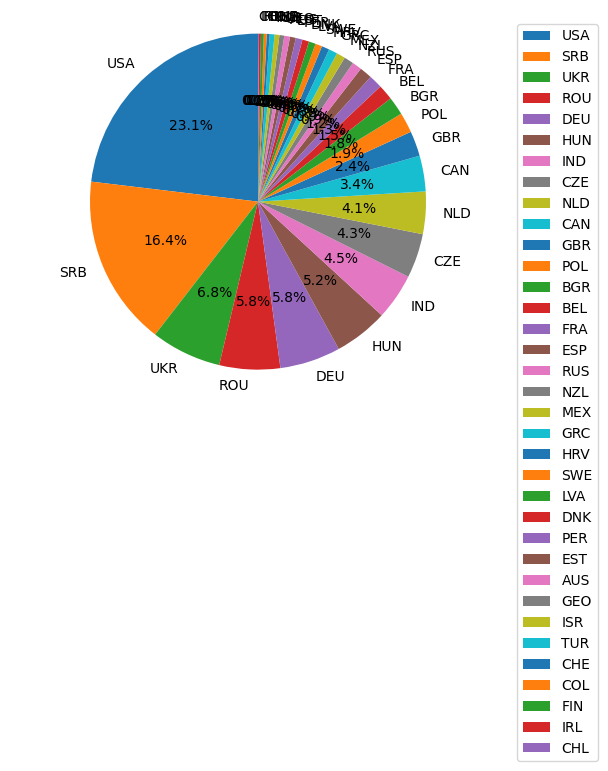

In [26]:
# Pie chart - dropped NA for now
categories_country = demographics['COUNTRY'].dropna().unique()
category_country_counts = demographics['COUNTRY'].dropna().value_counts()

plt.pie(category_country_counts, labels=categories_country, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories_country, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

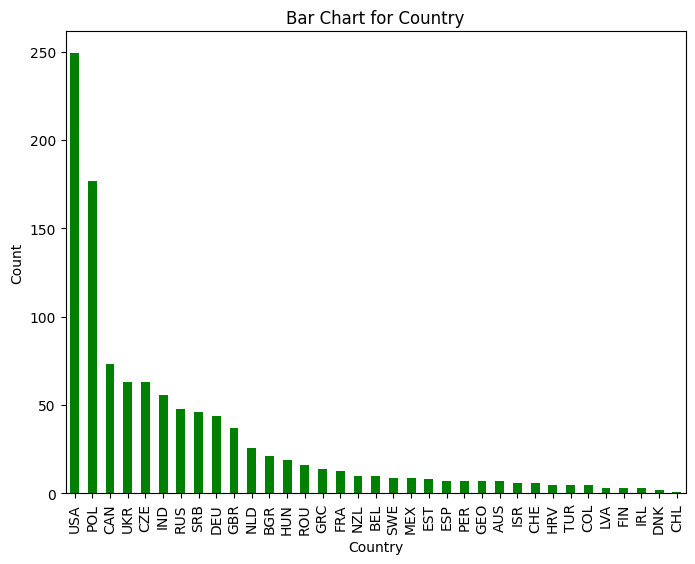

In [47]:
country = demographics['COUNTRY'].dropna()

plt.figure(figsize=(8, 6))
country.value_counts().plot(kind='bar', color='green')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Chart for Country')
plt.show()

#### *Ideas*:
- Impute age with mean (only around 3% missing)
- Is country important for prognosis? If not, drop. If yes, what do to regarding missing values? 
- COUNTRY variable (if used): should we group by continent? - it has way too many countries
- RACE variable is highly imbalanced - maybe use just two categories (white / non-white)?
- should we keep ETHNIC in the final dataset?

### 2. Clinical events (ce.csv) - [One record per event per subject]

In [55]:
visual_progress_bar(80)

[################----] 80%

In [8]:
# Load clinical events .csv file
file_path = 'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files/ce.csv'

# Create data frame
clinical_events = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'CESEQ' columns in ascending order
clinical_events = clinical_events.sort_values(by=['USUBJID','CESEQ'], ascending=True)
clinical_events

,STUDYID,DOMAIN,USUBJID,CESEQ,CEGRPID,CEREFID,CESPID,CETERM,CEMODIFY,CEDECOD,...,CEENDY,CESTRF,CEENRF,CEEVLINT,CEEVINTX,CESTRTPT,CESTTPT,CEENRTPT,CEENTPT,MIDS
432,MSOAC,CE,MSOAC/0031,1,NaN,NaN,NaN,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1
1334,MSOAC,CE,MSOAC/0031,2,NaN,NaN,NaN,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 2
1022,MSOAC,CE,MSOAC/0035,1,NaN,NaN,NaN,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1
1368,MSOAC,CE,MSOAC/0035,2,NaN,NaN,NaN,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 2
1819,MSOAC,CE,MSOAC/0041,1,NaN,NaN,NaN,MS EXACERBATION #1,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,...,NaN,NaN,ONGOING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,MSOAC,CE,MSOAC/9995,4,NaN,NaN,NaN,UNCONFIRMED MS RELAPSE,Suspected Relapse,RELAPSE-LIKE EVENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,MSOAC,CE,MSOAC/9998,1,NaN,NaN,NaN,Confirmed MS Exacerbation,NaN,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1
1739,MSOAC,CE,MSOAC/9998,2,NaN,NaN,NaN,Suspected MS Exacerbation,NaN,RELAPSE-LIKE EVENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,MSOAC,CE,MSOAC/9999,1,NaN,NaN,NaN,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1


Check how many different patients in the dataset

In [6]:
unique_count = clinical_events['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}") #less than the total we have (2465)

Number of (unique) patients in this dataset: 1215


Check columns with missing values

In [9]:
missing_percentage_ce = (clinical_events.isnull().sum() / len(clinical_events)) * 100
missing_clinical_events = pd.DataFrame({'Column Name': missing_percentage_ce.index, 'Missing Percentage': missing_percentage_ce.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_clinical_events)

   Column Name  Missing Percentage
0      STUDYID            0.000000
1       DOMAIN            0.000000
2      USUBJID            0.000000
3        CESEQ            0.000000
4      CEGRPID          100.000000
5      CEREFID          100.000000
6       CESPID          100.000000
7       CETERM            0.000000
8     CEMODIFY           55.315355
9      CEDECOD           54.624471
10       CECAT           85.892579
11      CESCAT          100.000000
12     CEPRESP           45.375529
13     CEOCCUR           45.375529
14      CESTAT          100.000000
15    CEREASND          100.000000
16    CEBODSYS           77.646534
17       CELOC          100.000000
18       CELAT          100.000000
19       CESEV           55.449075
20       CESER           78.493425
21      CEPATT          100.000000
22       CEOUT           87.162915
23     CESHOSP          100.000000
24    CECONTRT           81.034099
25     CETOXGR          100.000000
26    VISITNUM           39.915311
27       VISIT      

Drop columns with more than 80% missing values and others, namely:
- **STUDYID**: (irrelevant)
- **DOMAIN**: (irrelevant)
- **CEGRPID, CEREFID, CESPID, CESCAT, CESTAT, CEREASND, CELOC, CELAT, CEPATT, CETOXGR, EPOCH, CEDTC, CESTDTC, CEENDTC, CESTRF, CEEVLINT,CEEVINTX, CESTRTPT, CESTTPT, CEENRTPT, CEENTPT**: (all values missing and not mentioned in the dataset)
- **VISITNUM**: Visit Number (kind of a code number for VISIT, they give the same info and missing value in same rows)

Columns being dropped, but not sure if we *should keep*:
- **CESHOSP**: Requires or Prolongs Hospitalization (all values missing but is mentioned in the dictionary)
- **CECAT**: Category for Clinical Event 
- **CEOUT**: Outcome of Event
- **CECONTRT**: Concomitant or Additional Trtmnt Given
- **CEENDY**: Study Day of End of Observation
- **CEENRF**: End Relative to Reference Period 

In [10]:
# start by dropping columns with all missing
columns_to_drop = missing_clinical_events[missing_clinical_events['Missing Percentage'] > 80]['Column Name'].tolist()
additional_columns_to_drop = ['STUDYID', 'DOMAIN','VISITNUM']  # Add your column names here
columns_to_drop.extend(additional_columns_to_drop)
clinical_events.drop(columns=columns_to_drop, inplace=True)
clinical_events

,USUBJID,CESEQ,CETERM,CEMODIFY,CEDECOD,CEPRESP,CEOCCUR,CEBODSYS,CESEV,CESER,VISITNUM,VISIT,CEDY,CESTDY,MIDS
432,MSOAC/0031,1,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,Nervous system disorders,MILD,N,NaN,NaN,NaN,268.0,MS RELAPSE 1
1334,MSOAC/0031,2,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,Nervous system disorders,MILD,N,NaN,NaN,NaN,814.0,MS RELAPSE 2
1022,MSOAC/0035,1,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,144.0,MS RELAPSE 1
1368,MSOAC/0035,2,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,221.0,MS RELAPSE 2
1819,MSOAC/0041,1,MS EXACERBATION #1,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,NaN,NaN,Nervous system disorders,MILD,N,NaN,NaN,NaN,179.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,MSOAC/9995,4,UNCONFIRMED MS RELAPSE,Suspected Relapse,RELAPSE-LIKE EVENT,NaN,NaN,NaN,MILD,NaN,NaN,NaN,NaN,682.0,NaN
871,MSOAC/9998,1,Confirmed MS Exacerbation,NaN,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,Nervous system disorders,NaN,NaN,3.0,MONTH 3,85.0,79.0,MS RELAPSE 1
1739,MSOAC/9998,2,Suspected MS Exacerbation,NaN,RELAPSE-LIKE EVENT,NaN,NaN,Nervous system disorders,NaN,NaN,999.0,UNSCHEDULED,95.0,NaN,NaN
975,MSOAC/9999,1,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,NaN,MILD,NaN,NaN,NaN,NaN,69.0,MS RELAPSE 1


- descriptive analysis of continuous variables

In [26]:
continuous_columns = ['CEDY','CESTDY']

descriptive_continuous = {
    'Count': clinical_events[continuous_columns].count(), #cases that are not missing
    'Missing Cases': clinical_events[continuous_columns].isna().sum(),
    'Mean': clinical_events[continuous_columns].mean(),
    'Standard Deviation': clinical_events[continuous_columns].std()
}

cont_clinical_events = pd.DataFrame(descriptive_continuous)

print(cont_clinical_events)

        Count  Missing Cases        Mean  Standard Deviation
CEDY     2482           2005  383.682917          219.006862
CESTDY   1968           2519  385.452236          298.653233


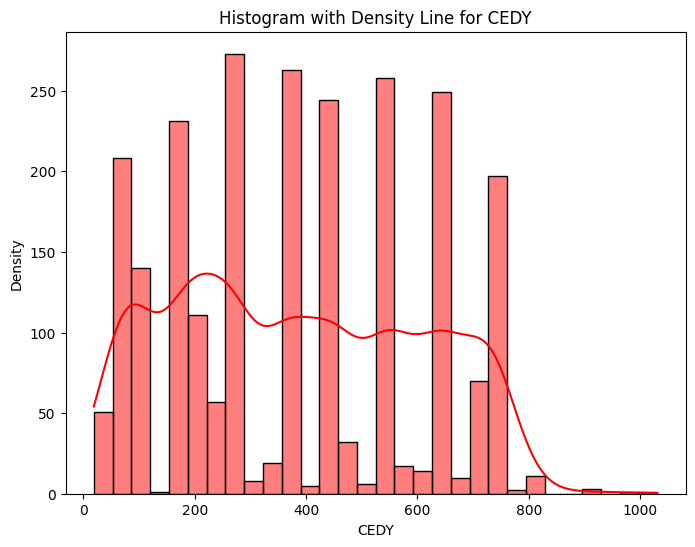

In [27]:
CEDY = clinical_events['CEDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(CEDY, kde=True, color='red', bins=30)
plt.xlabel('CEDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for CEDY')
plt.show() # more or less normaly distributed

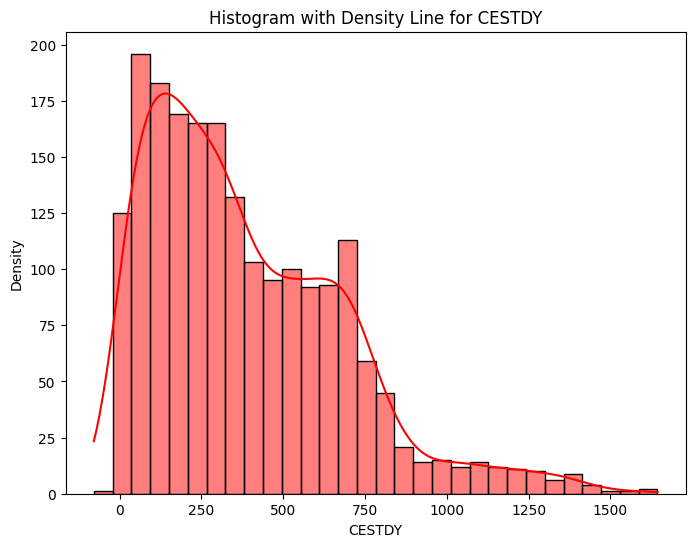

In [28]:
CESTDY = clinical_events['CESTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(CESTDY, kde=True, color='red', bins=30)
plt.xlabel('CESTDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for CESTDY')
plt.show()

- descriptive analysis of categorical variables

In [14]:
ceterm_counts_clinical_events = clinical_events['CETERM'].value_counts().reset_index()
ceterm_counts_clinical_events.columns = ['CETERM', 'Count']
print(ceterm_counts_clinical_events)

                                                CETERM  Count
0                    POSSIBLE RELAPSE SINCE LAST VISIT   2451
1                         MS RELAPSE CONFIRMED BY EDSS    762
2                                           MS RELAPSE    573
3                               UNCONFIRMED MS RELAPSE    271
4                                      MS EXACERBATION     30
..                                                 ...    ...
173                   NUMBNESS WAIST DOWN (MS RELAPSE)      1
174                                        RELAPSE # 2      1
175  INCREASED LEG TWITCHING WITH R GREATER THAN L ...      1
176                                          MSRELAPSE      1
177                MS RELAPSE-PROGRESSIVE LEG WEAKNESS      1

[178 rows x 2 columns]


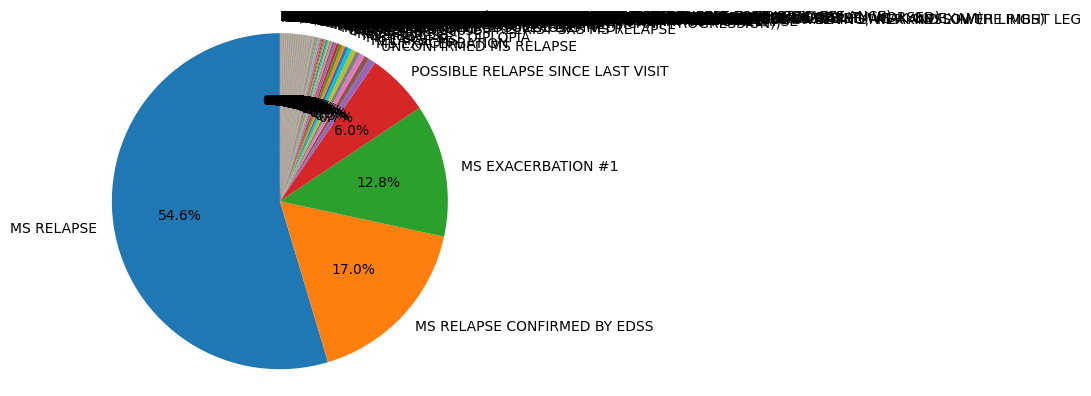

In [15]:
# Pie chart - dropped NA for now
categories = clinical_events['CETERM'].dropna().unique()
category_counts = clinical_events['CETERM'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
#plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show() #do something with this one

In [15]:
cemodify_counts_clinical_events = clinical_events['CEMODIFY'].value_counts().reset_index()
cemodify_counts_clinical_events.columns = ['CEMODIFY', 'Count']
print(cemodify_counts_clinical_events)

                             CEMODIFY  Count
0              EDSS Confirmed Relapse    762
1                   Suspected Relapse    470
2       Neurologist Confirmed Relapse    459
3              INEC Confirmed Relapse    181
4                   Confirmed Relapse     84
5        Non-Protocol Defined Relapse     24
6                  Multiple Sclerosis     14
7       MULTIPLE SCLEROSIS AGGRAVATED      7
8   PROGRESSION OF MULTIPLE SCLEROSIS      2
9                  MULTIPLE SCLEROSIS      1
10                   MS-LIKE SYNDROME      1


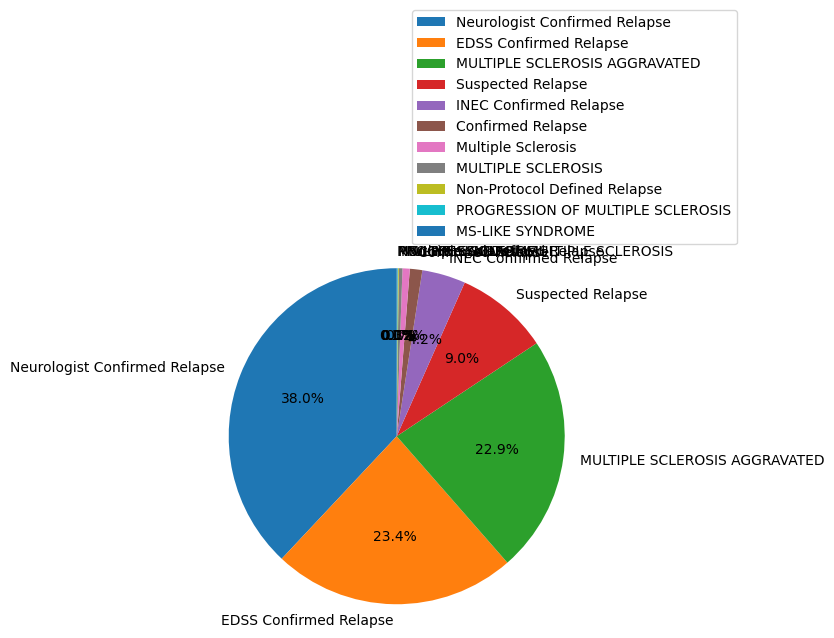

In [16]:
# Pie chart - dropped NA for now
categories = clinical_events['CEMODIFY'].dropna().unique()
category_counts = clinical_events['CEMODIFY'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [11]:
cedecod_counts_clinical_events = clinical_events['CEDECOD'].value_counts().reset_index()
cedecod_counts_clinical_events.columns = ['CEDECOD', 'Count']
print(cedecod_counts_clinical_events) #put everything upper case

                      CEDECOD  Count
0  MULTIPLE SCLEROSIS RELAPSE   1505
1          RELAPSE-LIKE EVENT    506
2          MULTIPLE SCLEROSIS     24
3          Multiple sclerosis      1


In [12]:
clinical_events['CEDECOD'] = clinical_events['CEDECOD'].str.upper()
cedecod_counts_clinical_events = clinical_events['CEDECOD'].value_counts().reset_index()
cedecod_counts_clinical_events.columns = ['CEDECOD', 'Count']
print(cedecod_counts_clinical_events)

                      CEDECOD  Count
0  MULTIPLE SCLEROSIS RELAPSE   1505
1          RELAPSE-LIKE EVENT    506
2          MULTIPLE SCLEROSIS     25


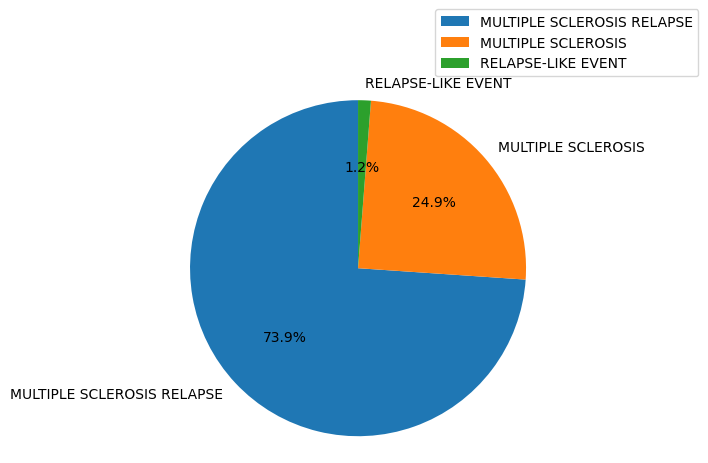

In [18]:
# Pie chart - dropped NA for now
categories = clinical_events['CEDECOD'].dropna().unique()
category_counts = clinical_events['CEDECOD'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [16]:
cebodsys_counts_clinical_events = clinical_events['CEBODSYS'].value_counts().reset_index()
cebodsys_counts_clinical_events.columns = ['CEBODSYS', 'Count']
print(cebodsys_counts_clinical_events)

                   CEBODSYS  Count
0  Nervous system disorders   1003


Note: unique category - remove?

In [17]:
cesev_counts_clinical_events = clinical_events['CESEV'].value_counts().reset_index()
cesev_counts_clinical_events.columns = ['CESEV', 'Count']
print(cesev_counts_clinical_events) #severeness of disease

      CESEV  Count
0  MODERATE    989
1      MILD    784
2    SEVERE    226


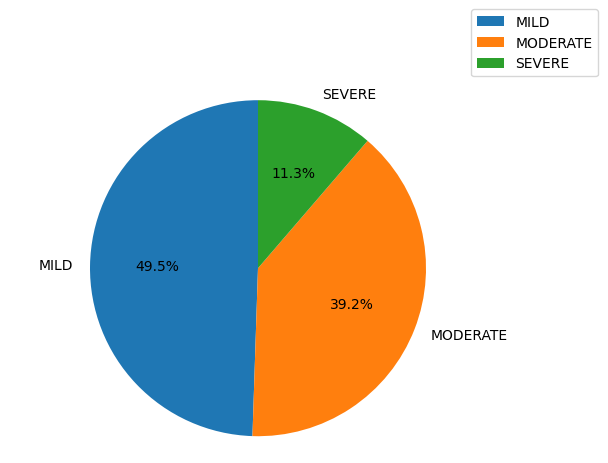

In [20]:
# Pie chart - dropped NA for now
categories = clinical_events['CESEV'].dropna().unique()
category_counts = clinical_events['CESEV'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [29]:
visit_counts_clinical_events = clinical_events['VISIT'].value_counts().reset_index()
visit_counts_clinical_events.columns = ['VISIT', 'Count']
print(visit_counts_clinical_events)

                     VISIT  Count
0                  VISIT 5    297
1                  VISIT 6    291
2                  VISIT 9    287
3                 VISIT 10    282
4                 VISIT 12    275
5                 VISIT 11    271
6                 VISIT 14    267
7                 VISIT 13    266
8         UNSCD RLPSE EVAL    214
9                  VISIT 3     48
10                 VISIT 4     47
11                 VISIT 8     44
12                 VISIT 7     44
13  EARLY WITHDRAWAL VISIT     21
14             UNSCHEDULED     19
15      FOLLOW UP MONTH 27      8
16         FOLLOW UP VISIT      3
17                MONTH 24      2
18                 MONTH 6      2
19                MONTH 27      2
20                 MONTH 3      2
21                MONTH 18      1
22                MONTH 15      1
23     EARLY/TERMINATION 2      1
24                MONTH 12      1


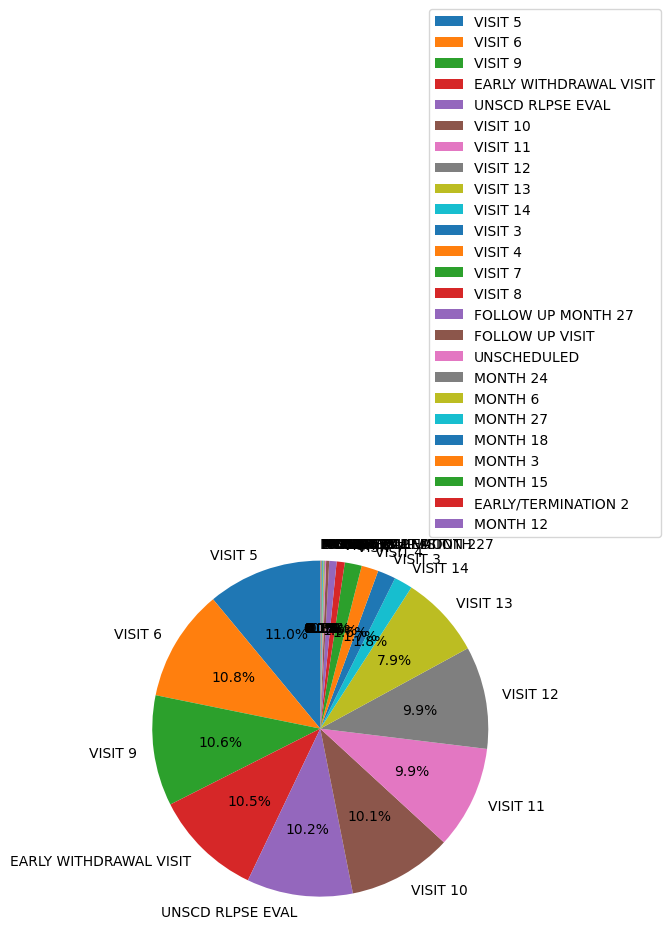

In [30]:
# Pie chart - dropped NA for now
categories = clinical_events['VISIT'].dropna().unique()
category_counts = clinical_events['VISIT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [13]:
mids_counts_clinical_events = clinical_events['MIDS'].value_counts().reset_index()
mids_counts_clinical_events.columns = ['MIDS', 'Count']
print(mids_counts_clinical_events) 

           MIDS  Count
0  MS RELAPSE 1    852
1  MS RELAPSE 2    367
2  MS RELAPSE 3    156
3  MS RELAPSE 4     75
4  MS RELAPSE 5     36
5  MS RELAPSE 6     14
6  MS RELAPSE 7      3
7  MS RELAPSE 8      1
8  MS RELAPSE 9      1


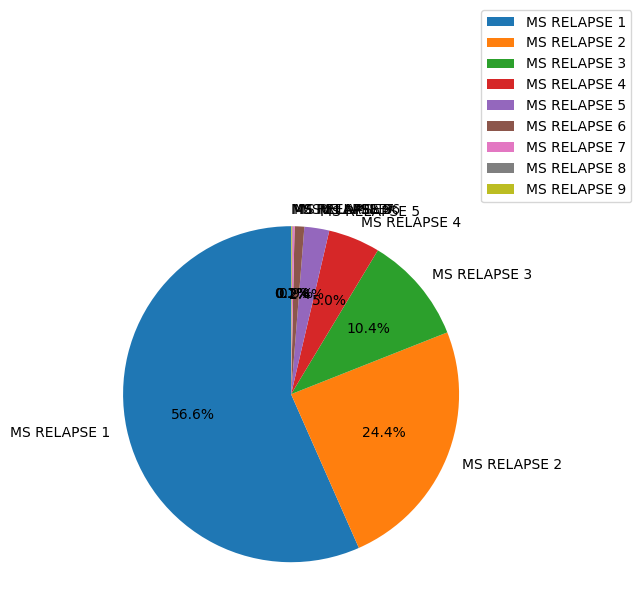

In [21]:
# Pie chart - dropped NA for now
categories = clinical_events['MIDS'].dropna().unique()
category_counts = clinical_events['MIDS'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

#### **Ideas**:
- MIDS column associated to MIDS column in milestones
- use CESEV column as output or input
- check ce_analysis.png!! some variables seem to complement each other
- CEDECOD organizes CEMODIFY, and CEMODIFY organizes CETERM (in way less categories)!!! -- *explore more these 3 columns*
- remove CEBODSYS since is only one category?
- for MIDS: maybe group when relapses are 5 or more
- VISITNUM is kind of a code number for VISIT, they give the same info

*continue: columns not yet analysed*

### 3. Disposition (ds.csv) - [One record per disposition status or protocol milestone per subject]

In [35]:
# Load disposition .csv file
file_path = 'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files/ds.csv'

# create data frame
disposition = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'DSSEQ' columns in ascending order
disposition = disposition.sort_values(by=['USUBJID','DSSEQ'], ascending=True)
disposition

,STUDYID,DOMAIN,USUBJID,DSSEQ,DSGRPID,DSREFID,DSSPID,DSTERM,DSMODIFY,DSDECOD,DSCAT,DSSCAT,VISITNUM,VISIT,EPOCH,DSDTC,DSSTDTC,DSSTDY
1194,MSOAC,DS,MSOAC/0019,1,NaN,NaN,NaN,WRITTEN CONSENT OBTAINED,WRITTEN CONSENT OBTAINED,INFORMED CONSENT OBTAINED,PROTOCOL MILESTONE,NaN,-3.0,SCREENING -3,NaN,NaN,NaN,-27
712,MSOAC,DS,MSOAC/0019,2,NaN,NaN,NaN,BAD INTERIM ANALYSIS RESULT,OTHER,OTHER,DISPOSITION EVENT,NaN,997.0,EARLY/TERMINATION,NaN,NaN,NaN,899
108,MSOAC,DS,MSOAC/0019,3,NaN,NaN,NaN,BAD INTERIM ANALYSIS RESULT,OTHER,OTHER,DISPOSITION EVENT,NaN,36.0,MONTH 36,NaN,NaN,NaN,1088
992,MSOAC,DS,MSOAC/0030,1,NaN,NaN,NaN,FIRST RANDOMIZATION,NaN,RANDOMIZATION,PROTOCOL MILESTONE,NaN,NaN,NaN,NaN,NaN,NaN,1
858,MSOAC,DS,MSOAC/0041,1,NaN,NaN,NaN,Lack of Clinical Efficacy,NaN,LACK OF EFFICACY,DISPOSITION EVENT,EARLY WITHDRAWAL,NaN,NaN,NaN,NaN,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,MSOAC,DS,MSOAC/9974,2,NaN,NaN,NaN,SPONSOR DECISION,OTHER,OTHER,DISPOSITION EVENT,NaN,997.0,EARLY/TERMINATION,NaN,NaN,NaN,1007
616,MSOAC,DS,MSOAC/9980,1,NaN,NaN,NaN,FIRST RANDOMIZATION,NaN,RANDOMIZATION,PROTOCOL MILESTONE,NaN,NaN,NaN,NaN,NaN,NaN,1
606,MSOAC,DS,MSOAC/9986,1,NaN,NaN,NaN,FIRST RANDOMIZATION,NaN,RANDOMIZATION,PROTOCOL MILESTONE,NaN,NaN,NaN,NaN,NaN,NaN,1
390,MSOAC,DS,MSOAC/9998,1,NaN,NaN,NaN,WRITTEN CONSENT OBTAINED,WRITTEN CONSENT OBTAINED,INFORMED CONSENT OBTAINED,PROTOCOL MILESTONE,NaN,-3.0,SCREENING -3,NaN,NaN,NaN,-28


Number of unique patients

In [32]:
unique_count = disposition['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}")

Number of (unique) patients in this dataset: 852


Check how many missing values we have per column

In [36]:
missing_percentage_ds = (disposition.isnull().sum() / len(disposition)) * 100
missing_disposition = pd.DataFrame({'Column Name': missing_percentage_ds.index, 'Missing Percentage': missing_percentage_ds.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_disposition)

   Column Name  Missing Percentage
0      STUDYID            0.000000
1       DOMAIN            0.000000
2      USUBJID            0.000000
3        DSSEQ            0.000000
4      DSGRPID          100.000000
5      DSREFID          100.000000
6       DSSPID          100.000000
7       DSTERM            0.000000
8     DSMODIFY           42.789598
9      DSDECOD            0.000000
10       DSCAT            0.000000
11      DSSCAT           96.611505
12    VISITNUM           42.789598
13       VISIT           42.789598
14       EPOCH          100.000000
15       DSDTC          100.000000
16     DSSTDTC          100.000000
17      DSSTDY            0.000000


Note: DSSCAT is always 'early withdrawal', but seems random in a way

Drop columns with more than 95% values missing and others, namely:
- **STUDYID**
- **DOMAIN**
- **DSGRPID, DSREFID, DSSPID, EPOCH, DSDTC, DSSTDTC**: (all missing and not even mentioned in the dictionary)
- **VISITNUM**: Visit Number (kind of a code number for VISIT, they give the same info and missing value in same rows)

Columns being dropped, but not sure if we should keep:
- **DSSCAT**: Subcategory for Disposition Event (only NA or EARLY WITHDRAWAL)

In [37]:
columns_to_drop = ['STUDYID','DOMAIN','DSGRPID','DSREFID','DSSPID','DSSCAT','VISITNUM','EPOCH','DSDTC','DSSTDTC']
disposition = disposition.drop(columns_to_drop, axis=1)
disposition

,USUBJID,DSSEQ,DSTERM,DSMODIFY,DSDECOD,DSCAT,VISIT,DSSTDY
1194,MSOAC/0019,1,WRITTEN CONSENT OBTAINED,WRITTEN CONSENT OBTAINED,INFORMED CONSENT OBTAINED,PROTOCOL MILESTONE,SCREENING -3,-27
712,MSOAC/0019,2,BAD INTERIM ANALYSIS RESULT,OTHER,OTHER,DISPOSITION EVENT,EARLY/TERMINATION,899
108,MSOAC/0019,3,BAD INTERIM ANALYSIS RESULT,OTHER,OTHER,DISPOSITION EVENT,MONTH 36,1088
992,MSOAC/0030,1,FIRST RANDOMIZATION,NaN,RANDOMIZATION,PROTOCOL MILESTONE,NaN,1
858,MSOAC/0041,1,Lack of Clinical Efficacy,NaN,LACK OF EFFICACY,DISPOSITION EVENT,NaN,365
...,...,...,...,...,...,...,...,...
861,MSOAC/9974,2,SPONSOR DECISION,OTHER,OTHER,DISPOSITION EVENT,EARLY/TERMINATION,1007
616,MSOAC/9980,1,FIRST RANDOMIZATION,NaN,RANDOMIZATION,PROTOCOL MILESTONE,NaN,1
606,MSOAC/9986,1,FIRST RANDOMIZATION,NaN,RANDOMIZATION,PROTOCOL MILESTONE,NaN,1
390,MSOAC/9998,1,WRITTEN CONSENT OBTAINED,WRITTEN CONSENT OBTAINED,INFORMED CONSENT OBTAINED,PROTOCOL MILESTONE,SCREENING -3,-28


maybe drop DSSEQ because only counts events for each patient, or not since it gives the order of the events

- analysis of continuous variables

In [39]:
continuous_columns = ['DSSTDY']

descriptive_continuous = {
    'Count': disposition[continuous_columns].count(), #cases that are not missing
    'Missing Cases': disposition[continuous_columns].isna().sum(),
    'Mean': disposition[continuous_columns].mean(),
    'Standard Deviation': disposition[continuous_columns].std()
}

cont_disposition = pd.DataFrame(descriptive_continuous)

print(cont_disposition)

        Count  Missing Cases        Mean  Standard Deviation
DSSTDY   1269              0  314.274232          469.295417


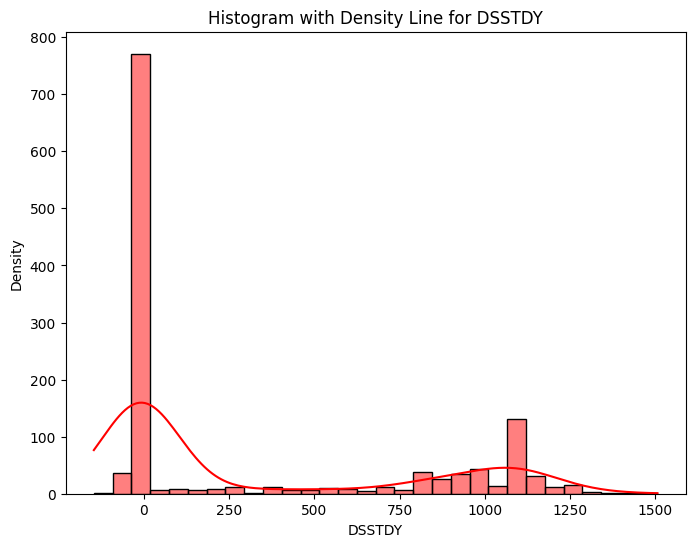

In [40]:
DSSTDY = disposition['DSSTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(DSSTDY, kde=True, color='red', bins=30)
plt.xlabel('DSSTDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for DSSTDY')
plt.show()

we have negative time - check how this was transformed

- analysis of categorical variables

In [46]:
categorical_columns = ['DSTERM','DSMODIFY','DSDECOD','DSCAT','VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': disposition[col].count(),
        'Missing Cases': disposition[col].isna().sum(),
        'Unique Values': disposition[col].nunique(),
        'Mode': disposition[col].mode().values[0],
        'Mode Frequency': disposition[col].value_counts().max()
    }

cat_disposition = pd.DataFrame(descriptive_categorical).T
print(cat_disposition)

         Count Missing Cases Unique Values                      Mode  \
DSTERM    1269             0           181       FIRST RANDOMIZATION   
DSMODIFY   726           543             8  WRITTEN CONSENT OBTAINED   
DSDECOD   1269             0            10             RANDOMIZATION   
DSCAT     1269             0             2        PROTOCOL MILESTONE   
VISIT      726           543             4              SCREENING -3   

         Mode Frequency  
DSTERM              500  
DSMODIFY            309  
DSDECOD             500  
DSCAT               809  
VISIT               309  


In [24]:
# DSTERM
dsterm_counts_disposition = disposition['DSTERM'].value_counts().reset_index()
dsterm_counts_disposition.columns = ['DSTERM', 'Count']
print(dsterm_counts_disposition)

                                                DSTERM  Count
0                                  FIRST RANDOMIZATION    500
1                             WRITTEN CONSENT OBTAINED    309
2                          END OF PLANNED STUDY COURSE     74
3                                     SPONSOR DECISION     54
4                             SPONSOR TERMINATED STUDY     22
..                                                 ...    ...
176          SPONSOR DECISION TO TERMINATE TRIAL EARLY      1
177  PATIENT WITHDREW CONSENT DUE TO PROGRESSION OF MS      1
178                      NONCOMPLIANCE WITH STUDY DRUG      1
179                              UNABLE TO CONTACT PT.      1
180                            SPONSOR HAS ENDED STUDY      1

[181 rows x 2 columns]


In [25]:
# DSMODIFY
dsmodify_counts_disposition = disposition['DSMODIFY'].value_counts().reset_index()
dsmodify_counts_disposition.columns = ['DSMODIFY', 'Count']
print(dsmodify_counts_disposition)

                       DSMODIFY  Count
0      WRITTEN CONSENT OBTAINED    309
1                         OTHER    249
2   END OF PLANNED STUDY COURSE     74
3  PATIENT DECISION TO WITHDRAW     66
4             LOST TO FOLLOW-UP     10
5       DEATH: NOT DRUG RELATED      8
6                    SERIOUS AE      6
7            ADVERSE EXPERIENCE      4


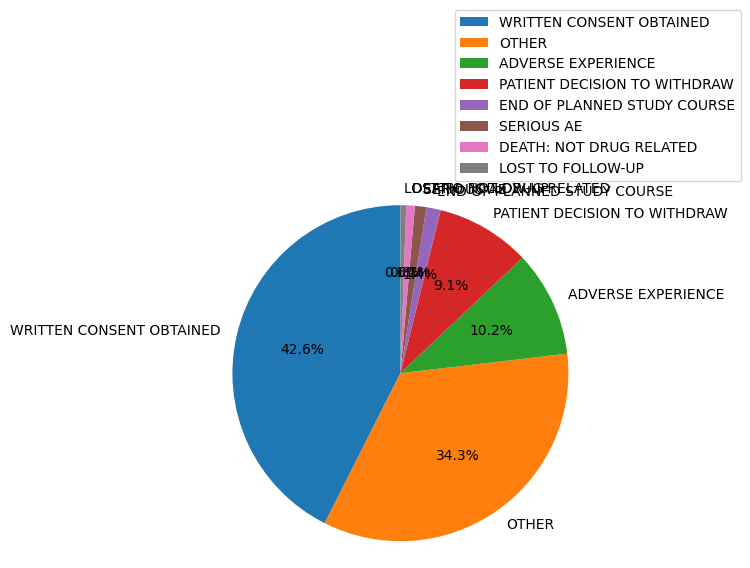

In [41]:
# Pie chart - dropped NA for now
categories = disposition['DSMODIFY'].dropna().unique()
category_counts = disposition['DSMODIFY'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [26]:
# Check categories of DSTERM when DSMODIFY is NA
filter_dsterm = disposition.loc[disposition['DSMODIFY'].isnull(), 'DSTERM']
unique_values_dsterm = filter_dsterm.unique()
print(unique_values_dsterm)

['FIRST RANDOMIZATION' 'Lack of Clinical Efficacy'
 'Patient withdrew of consent' 'Investigator judgment'
 'Serious Adverse Event' 'Patient withdrew of consent: PERSONAL PROBLEMS'
 'Adverse Event' 'REFUSED FOLLOW-UP'
 'Initiation of other treatment for MS' 'Lost to Follow up']


In [27]:
# DSDECOD
dsdecod_counts_disposition = disposition['DSDECOD'].value_counts().reset_index()
dsdecod_counts_disposition.columns = ['DSDECOD', 'Count']
print(dsdecod_counts_disposition)

                     DSDECOD  Count
0              RANDOMIZATION    500
1  INFORMED CONSENT OBTAINED    309
2                      OTHER    253
3      WITHDRAWAL BY SUBJECT     81
4                  COMPLETED     74
5              ADVERSE EVENT     18
6           LACK OF EFFICACY     14
7          LOST TO FOLLOW-UP     11
8                      DEATH      8
9      INVESTIGATOR JUDGMENT      1


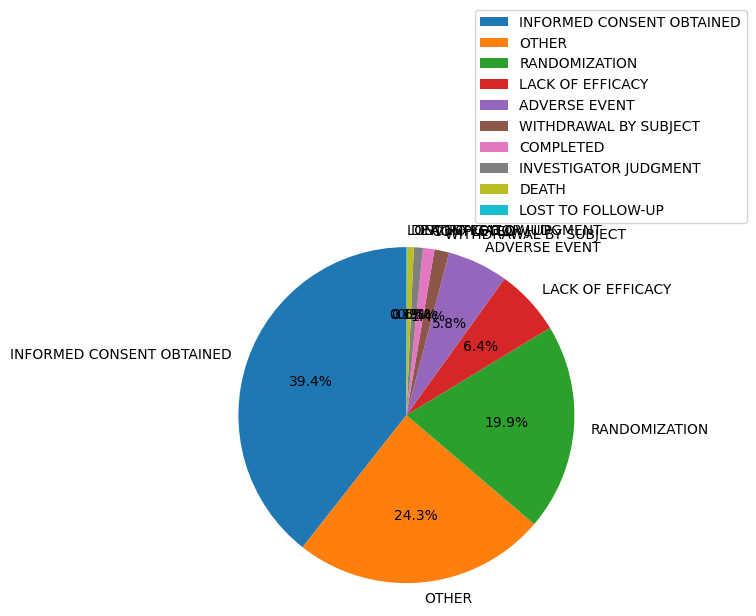

In [42]:
# Pie chart - dropped NA for now
categories = disposition['DSDECOD'].dropna().unique()
category_counts = disposition['DSDECOD'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [44]:
# DSCAT
dscat_counts_disposition = disposition['DSCAT'].value_counts().reset_index()
dscat_counts_disposition.columns = ['DSCAT', 'Count']
print(dscat_counts_disposition)

                DSCAT  Count
0  PROTOCOL MILESTONE    809
1   DISPOSITION EVENT    460


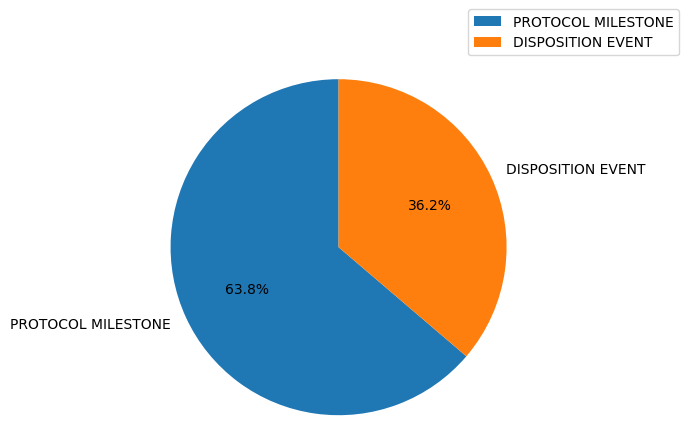

In [45]:
# Pie chart - dropped NA for now
categories = disposition['DSCAT'].dropna().unique()
category_counts = disposition['DSCAT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [38]:
# VISIT
visit_counts_disposition = disposition['VISIT'].value_counts().reset_index()
visit_counts_disposition.columns = ['VISIT', 'Count']
print(visit_counts_disposition)

                 VISIT  Count
0         SCREENING -3    309
1    EARLY/TERMINATION    292
2             MONTH 36     78
3  EARLY/TERMINATION 2     47


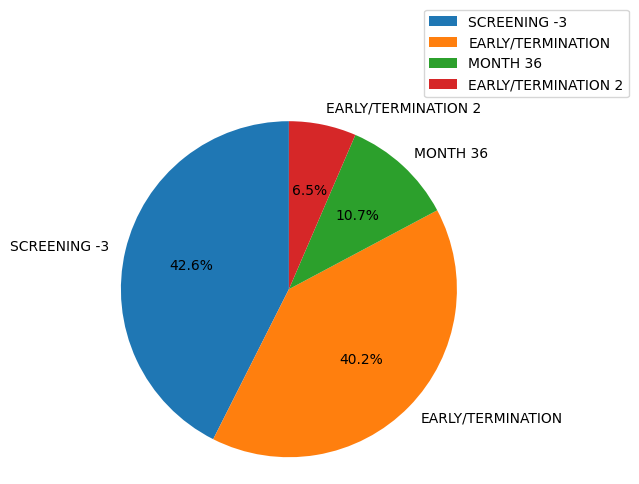

In [43]:
# Pie chart - dropped NA for now
categories = disposition['VISIT'].dropna().unique()
category_counts = disposition['VISIT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

Note: DSDECOD seems to organize DSMODIFY and DSTERM in groups

#### **Notes and Ideas**:
- DSMODIFY seems to group DSTERM
- DSTERM seems to need survival analysis
- some of the categories also exist in the DSMODIFY -- so are they missing??
- every time it is 'FIRST RANDOMIZATION', it is missing in the other variable
- explore better the relation between DSTERM, DSMODIFY and DSDECOD

### 4. Medical history (mh.csv) - [One record per medical history event per subject]

In [54]:
visual_progress_bar(60)

[############--------] 60%

*CONTINUE!!!*

In [47]:
# Load medical history .csv file
file_path = 'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files/mh.csv'

# create data frame
medical_history = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'MHSEQ' columns in ascending order
medical_history = medical_history.sort_values(by=['USUBJID','MHSEQ'], ascending=True)
medical_history #check warning!!!

C:\Users\anaso\AppData\Local\Temp\ipykernel_26696\1855323696.py:5: DtypeWarning: Columns (9,23,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  medical_history = pd.read_csv(file_path)


,STUDYID,DOMAIN,USUBJID,MHSEQ,MHGRPID,MHREFID,MHSPID,MHTERM,MHMODIFY,MHLLT,...,MHDY,MHSTDY,MHENDY,MHDUR,MHSTRF,MHENRF,MHEVLINT,MHENRTPT,MHENTPT,MHHLGT
21041,MSOAC,MH,MSOAC/0014,1,NaN,NaN,NaN,RRMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12262,MSOAC,MH,MSOAC/0016,1,NaN,NaN,NaN,BOWEL URGENCY OR INCONTINENCE,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
12296,MSOAC,MH,MSOAC/0016,2,NaN,NaN,NaN,CEREBELLAR SYMPTOMS,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
12302,MSOAC,MH,MSOAC/0016,3,NaN,NaN,NaN,CONSTIPATION,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
12323,MSOAC,MH,MSOAC/0016,4,NaN,NaN,NaN,DECREASED MENTATION,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,MSOAC,MH,MSOAC/9998,36,NaN,NaN,NaN,URINARY URGENCY,NaN,NaN,...,-28.0,-294.0,NaN,NaN,NaN,NaN,NaN,ONGOING,SCREENING -3,NaN
15372,MSOAC,MH,MSOAC/9998,37,NaN,NaN,NaN,VERTIGO,NaN,NaN,...,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,ONGOING,SCREENING -3,NaN
20393,MSOAC,MH,MSOAC/9998,38,NaN,NaN,NaN,MS DIAGNOSIS,NaN,NaN,...,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20438,MSOAC,MH,MSOAC/9998,39,NaN,NaN,NaN,PPMS,NaN,NaN,...,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of patients

In [48]:
unique_count = medical_history['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}")

Number of (unique) patients in this dataset: 2465


Check how many missing values we have per column

In [50]:
missing_percentage_mh = (medical_history.isnull().sum() / len(medical_history)) * 100
missing_medical_history = pd.DataFrame({'Column Name': missing_percentage_mh.index, 'Missing Percentage': missing_percentage_mh.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_medical_history)

   Column Name  Missing Percentage
0      STUDYID            0.000000
1       DOMAIN            0.000000
2      USUBJID            0.000000
3        MHSEQ            0.000000
4      MHGRPID          100.000000
5      MHREFID          100.000000
6       MHSPID          100.000000
7       MHTERM            0.000000
8     MHMODIFY          100.000000
9        MHLLT           87.608563
10     MHDECOD           40.153131
11       MHCAT           12.391437
12      MHSCAT           69.644218
13     MHPRESP           76.980801
14     MHOCCUR           76.980801
15      MHSTAT          100.000000
16    MHREASND          100.000000
17    MHBODSYS           56.879476
18       MHSOC           84.153588
19       MHLOC          100.000000
20       MHLAT          100.000000
21       MHSEV           81.932805
22      MHPATT           99.169587
23    MHCONTRT           94.853725
24    VISITNUM           20.912692
25       VISIT           20.912692
26       MHDTC          100.000000
27     MHSTDTC      

Drop columns with more than 80% missing and others, namely:
- **STUDYID**
- **DOMAIN**
- **MHGRPID, MHREFID, MHSPID, MHMODIFY, MHSTAT, MHREASND, MHLOC, MHLAT, MHDTC, MHSTDTC, MHENDTC, MHDUR, MHSTRF**: (all values missing and not even mentioned in the dictionary)
- **VISITNUM**: Visit Number (kind of a code number for VISIT, they give the same info and missing value in same rows)

Columns being dropped, but maybe we should keep:
- **MHLLT**
- **MHSOC**
- **MHSEV**
- **MHPATT**
- **MHCONTRT**
- **MHSTDY**
- **MHENDY**
- **MHENRTPT**
- **MHENTPT**
- **MHHLGT**

In [51]:
columns_to_drop = missing_medical_history[missing_medical_history['Missing Percentage'] > 80]['Column Name'].tolist()
additional_columns_to_drop = ['STUDYID', 'DOMAIN','VISITNUM']  # Add your column names here
columns_to_drop.extend(additional_columns_to_drop)
medical_history.drop(columns=columns_to_drop, inplace=True)
medical_history

,USUBJID,MHSEQ,MHTERM,MHDECOD,MHCAT,MHSCAT,MHPRESP,MHOCCUR,MHBODSYS,VISIT,MHDY,MHENRF
21041,MSOAC/0014,1,RRMS,Relapsing-remitting multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN
12262,MSOAC/0016,1,BOWEL URGENCY OR INCONTINENCE,NaN,MS SYMPTOMS,NaN,Y,N,NaN,SCREENING,-21.0,NaN
12296,MSOAC/0016,2,CEREBELLAR SYMPTOMS,NaN,MS SYMPTOMS,NaN,Y,N,NaN,SCREENING,-21.0,NaN
12302,MSOAC/0016,3,CONSTIPATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,SCREENING,-21.0,NaN
12323,MSOAC/0016,4,DECREASED MENTATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,SCREENING,-21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15955,MSOAC/9998,36,URINARY URGENCY,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,SCREENING -3,-28.0,NaN
15372,MSOAC/9998,37,VERTIGO,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,SCREENING -3,-28.0,NaN
20393,MSOAC/9998,38,MS DIAGNOSIS,Multiple sclerosis,PRIMARY DIAGNOSIS,ONSET COURSE,NaN,NaN,NaN,SCREENING -3,-28.0,NaN
20438,MSOAC/9998,39,PPMS,Primary progressive multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,SCREENING -3,-28.0,NaN


Note: MHDECOD write extensivelly the name of some terms in MHTERM (seems an irrelevant variable, might drop later) - but at the same time it groups other categories in MHTERM which can help
- should i use MHDECOD when it exists, and complement with MHTERM in the missing values?

*to be continued*

### 5. Reproductive System Findings	(rp.csv) - [One record per Reproductive System Finding per time point per visit per subject]

In [69]:
# Load reproductive system .csv file
file_path = 'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files/rp.csv'

# create data frame
reproductive_system = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'RPSEQ' column in ascending order
reproductive_system = reproductive_system.sort_values(by=['USUBJID','RPSEQ'], ascending=True)
reproductive_system

,STUDYID,DOMAIN,USUBJID,RPSEQ,RPGRPID,RPREFID,RPSPID,RPTESTCD,RPTEST,RPCAT,...,RPDRVFL,VISITNUM,VISIT,VISITDY,EPOCH,RPDY,RPTPT,RPTPTNUM,RPELTM,RPTPTREF
315,MSOAC,RP,MSOAC/0041,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,2.0,VISIT 2,1,NaN,1,NaN,NaN,NaN,NaN
253,MSOAC,RP,MSOAC/0041,2,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,6.0,VISIT 6,167,NaN,167,NaN,NaN,NaN,NaN
207,MSOAC,RP,MSOAC/0041,3,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,15.1,EARLY WITHDRAWAL VISIT,365,NaN,365,NaN,NaN,NaN,NaN
458,MSOAC,RP,MSOAC/0094,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,1.0,BASELINE,-28,NaN,-28,NaN,NaN,NaN,NaN
498,MSOAC,RP,MSOAC/0094,2,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,2.0,VISIT 2,1,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,MSOAC,RP,MSOAC/9921,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,10.0,VISIT 10,340,NaN,340,NaN,NaN,NaN,NaN
365,MSOAC,RP,MSOAC/9951,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,1.0,BASELINE,-28,NaN,-28,NaN,NaN,NaN,NaN
19,MSOAC,RP,MSOAC/9951,2,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,2.0,VISIT 2,1,NaN,1,NaN,NaN,NaN,NaN
471,MSOAC,RP,MSOAC/9951,3,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,6.0,VISIT 6,176,NaN,176,NaN,NaN,NaN,NaN


In [70]:
# change entry 'MISSING' to NA
reproductive_system['RPORRES'] = reproductive_system['RPORRES'].replace('MISSING', pd.NA)
reproductive_system['RPSTRESC'] = reproductive_system['RPSTRESC'].replace('MISSING', pd.NA)

reproductive_system

,STUDYID,DOMAIN,USUBJID,RPSEQ,RPGRPID,RPREFID,RPSPID,RPTESTCD,RPTEST,RPCAT,...,RPDRVFL,VISITNUM,VISIT,VISITDY,EPOCH,RPDY,RPTPT,RPTPTNUM,RPELTM,RPTPTREF
315,MSOAC,RP,MSOAC/0041,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,2.0,VISIT 2,1,NaN,1,NaN,NaN,NaN,NaN
253,MSOAC,RP,MSOAC/0041,2,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,6.0,VISIT 6,167,NaN,167,NaN,NaN,NaN,NaN
207,MSOAC,RP,MSOAC/0041,3,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,15.1,EARLY WITHDRAWAL VISIT,365,NaN,365,NaN,NaN,NaN,NaN
458,MSOAC,RP,MSOAC/0094,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,1.0,BASELINE,-28,NaN,-28,NaN,NaN,NaN,NaN
498,MSOAC,RP,MSOAC/0094,2,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,2.0,VISIT 2,1,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,MSOAC,RP,MSOAC/9921,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,10.0,VISIT 10,340,NaN,340,NaN,NaN,NaN,NaN
365,MSOAC,RP,MSOAC/9951,1,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,1.0,BASELINE,-28,NaN,-28,NaN,NaN,NaN,NaN
19,MSOAC,RP,MSOAC/9951,2,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,2.0,VISIT 2,1,NaN,1,NaN,NaN,NaN,NaN
471,MSOAC,RP,MSOAC/9951,3,NaN,NaN,NaN,PREGTEST,Pregnancy Test,NaN,...,NaN,6.0,VISIT 6,176,NaN,176,NaN,NaN,NaN,NaN


Number of patients

In [71]:
unique_count = reproductive_system['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset {unique_count}") #less than total no. of women in the dataset

The number of unique values in USUBJID: 141


Check how many missing values per column

In [72]:
missing_percentage_rs = (reproductive_system.isnull().sum() / len(reproductive_system)) * 100
missing_reproductive_system = pd.DataFrame({'Column Name': missing_percentage_rs.index, 'Missing Percentage': missing_percentage_rs.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_reproductive_system)

   Column Name  Missing Percentage
0      STUDYID            0.000000
1       DOMAIN            0.000000
2      USUBJID            0.000000
3        RPSEQ            0.000000
4      RPGRPID          100.000000
5      RPREFID          100.000000
6       RPSPID          100.000000
7     RPTESTCD            0.000000
8       RPTEST            0.000000
9        RPCAT          100.000000
10      RPSCAT          100.000000
11     RPORRES            0.570342
12    RPORRESU          100.000000
13    RPSTRESC            0.570342
14    RPSTRESN          100.000000
15    RPSTRESU          100.000000
16      RPSTAT          100.000000
17    RPREASND          100.000000
18      RPSPEC            0.570342
19      RPBLFL          100.000000
20     RPDRVFL          100.000000
21    VISITNUM            0.000000
22       VISIT            0.000000
23     VISITDY            0.000000
24       EPOCH          100.000000
25        RPDY            0.000000
26       RPTPT          100.000000
27    RPTPTNUM      

Drop columns with 100% missing and others, namely:
- **STUDYID**
- **DOMAIN**
- **RPGRPID, RPREFID, RPSPID, RPCAT, RPSCAT, RPORRESU, RPSTRESN, RPSTRESU, RPSTAT, RPREASND, RPBLFL, RPDRVFL, EPOCH, RPTPT, RPTPTNUM, RPELTM, RPTPTREF**: (all missing and not even mentioned in the dictionary)

In [73]:
columns_to_drop = ['STUDYID','DOMAIN','RPGRPID','RPREFID','RPSPID','RPCAT','RPSCAT','RPORRESU','RPSTRESN','RPSTRESU','RPSTAT','RPREASND','RPBLFL','RPDRVFL','EPOCH','RPTPT','RPTPTNUM','RPELTM','RPTPTREF']
reproductive_system = reproductive_system.drop(columns_to_drop, axis=1)
reproductive_system

,USUBJID,RPSEQ,RPTESTCD,RPTEST,RPORRES,RPSTRESC,RPSPEC,VISITNUM,VISIT,VISITDY,RPDY
315,MSOAC/0041,1,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,URINE,2.0,VISIT 2,1,1
253,MSOAC/0041,2,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,URINE,6.0,VISIT 6,167,167
207,MSOAC/0041,3,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,SERUM,15.1,EARLY WITHDRAWAL VISIT,365,365
458,MSOAC/0094,1,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,SERUM,1.0,BASELINE,-28,-28
498,MSOAC/0094,2,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,URINE,2.0,VISIT 2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
409,MSOAC/9921,1,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,URINE,10.0,VISIT 10,340,340
365,MSOAC/9951,1,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,SERUM,1.0,BASELINE,-28,-28
19,MSOAC/9951,2,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,URINE,2.0,VISIT 2,1,1
471,MSOAC/9951,3,PREGTEST,Pregnancy Test,NEGATIVE,NEGATIVE,URINE,6.0,VISIT 6,176,176


Notes:
- RPTESTCD (Repro System Findings Test Short Name) and RPTEST (Reproductive System Findings Test Name) give the same and only one info
    - both only say 'Pregnancy test' or 'PREGTEST', so might just drop one (or both)
- VISITNUM (Visit Number) and VISIT (Visit Name) seem to give the same info, but:
    - 15.1	EARLY WITHDRAWAL VISIT
    - 15.2	FOLLOW UP MONTH 27
    - 15.3	FOLLOW UP VISIT
- VISITDY (Planned Study Day of Visit) and RPDY (Study Day of Specimen Collection) seem to give the same info -- drop one
    - maybe VISITDY cause is the planned day and might not be the actual one
- RPORRES (Result or Finding in Original Units) and RPSTRESC (Character Result/Finding in Std Format) always 'NEGATIVE' (or very little missing) -- variable does not seem to add anything, so maybe i should drop one (or both)

More columns to drop:

In [74]:
# Drop some more variables based on previous notes
columns_to_drop = ['RPTESTCD','RPTEST','RPSTRESC','RPORRES','VISITNUM','VISITDY']
reproductive_system = reproductive_system.drop(columns_to_drop, axis=1)
reproductive_system

,USUBJID,RPSEQ,RPSPEC,VISIT,RPDY
315,MSOAC/0041,1,URINE,VISIT 2,1
253,MSOAC/0041,2,URINE,VISIT 6,167
207,MSOAC/0041,3,SERUM,EARLY WITHDRAWAL VISIT,365
458,MSOAC/0094,1,SERUM,BASELINE,-28
498,MSOAC/0094,2,URINE,VISIT 2,1
...,...,...,...,...,...
409,MSOAC/9921,1,URINE,VISIT 10,340
365,MSOAC/9951,1,SERUM,BASELINE,-28
19,MSOAC/9951,2,URINE,VISIT 2,1
471,MSOAC/9951,3,URINE,VISIT 6,176


- analysis of categorical variables

In [76]:
# VISIT
visit_counts_reproductive_system = reproductive_system['VISIT'].value_counts().reset_index()
visit_counts_reproductive_system.columns = ['VISIT', 'Count']
total_count = visit_counts_reproductive_system['Count'].sum()
visit_counts_reproductive_system['Percentage'] = (visit_counts_reproductive_system['Count'] / total_count) * 100
print(visit_counts_reproductive_system)

                    VISIT  Count  Percentage
0                BASELINE    125   23.764259
1                 VISIT 2     94   17.870722
2                 VISIT 6     88   16.730038
3                VISIT 10     79   15.019011
4                VISIT 12     68   12.927757
5                VISIT 14     59   11.216730
6  EARLY WITHDRAWAL VISIT      8    1.520913
7      FOLLOW UP MONTH 27      3    0.570342
8                VISIT 11      1    0.190114
9         FOLLOW UP VISIT      1    0.190114


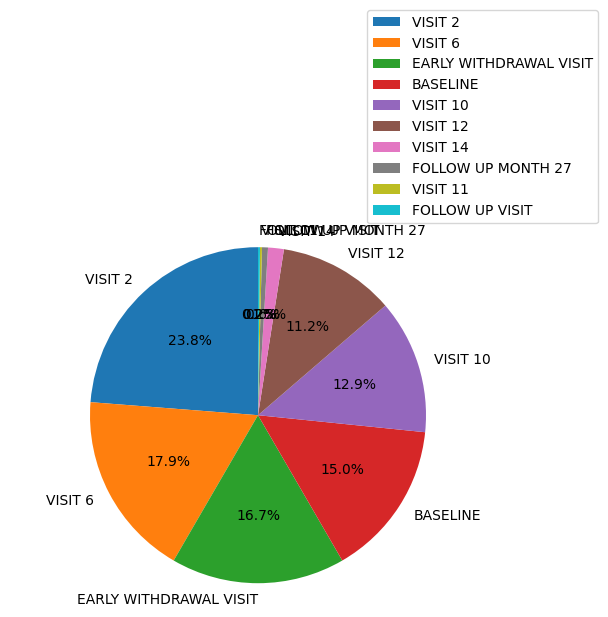

In [75]:
# Pie chart - dropped NA for now
categories = reproductive_system['VISIT'].dropna().unique()
category_counts = reproductive_system['VISIT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

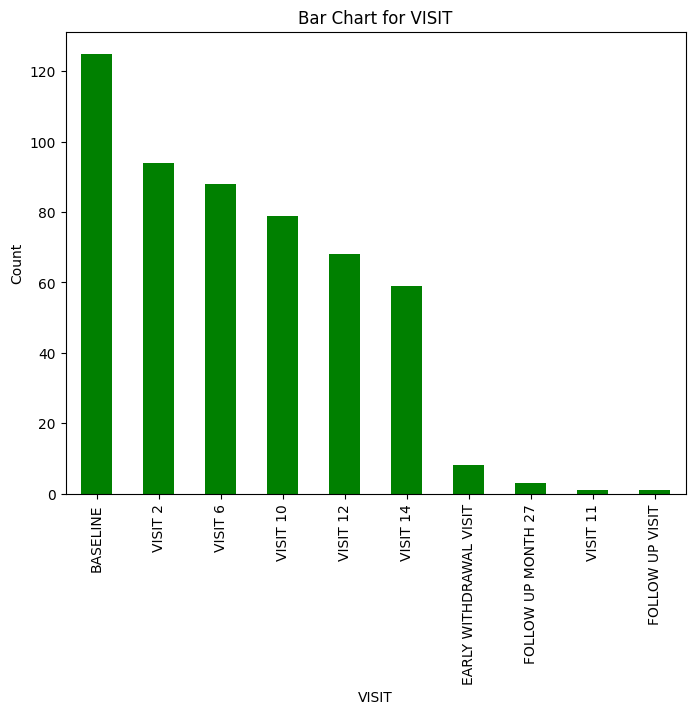

In [83]:
country = reproductive_system['VISIT'].dropna()

plt.figure(figsize=(8, 6))
country.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISIT')
plt.ylabel('Count')
plt.title('Bar Chart for VISIT')
plt.show()

In [82]:
# RPSPEC
rpspec_counts_reproductive_system = reproductive_system['RPSPEC'].value_counts().reset_index()
rpspec_counts_reproductive_system.columns = ['RPSPEC', 'Count']
total_count = rpspec_counts_reproductive_system['Count'].sum()
rpspec_counts_reproductive_system['Percentage'] = (rpspec_counts_reproductive_system['Count'] / total_count) * 100
print(rpspec_counts_reproductive_system)

  RPSPEC  Count  Percentage
0  URINE    388    74.18738
1  SERUM    135    25.81262


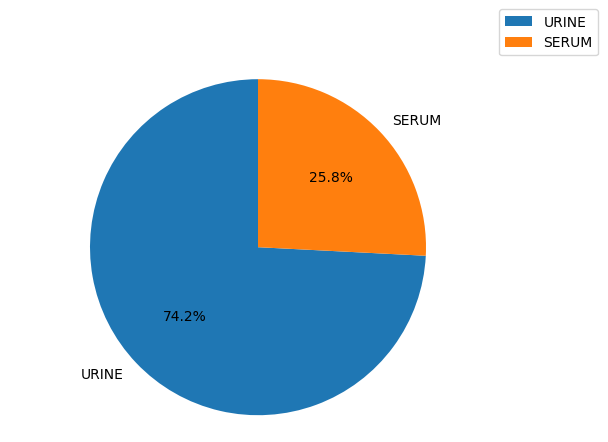

In [80]:
# Pie chart - dropped NA for now
categories = reproductive_system['RPSPEC'].dropna().unique()
category_counts = reproductive_system['RPSPEC'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

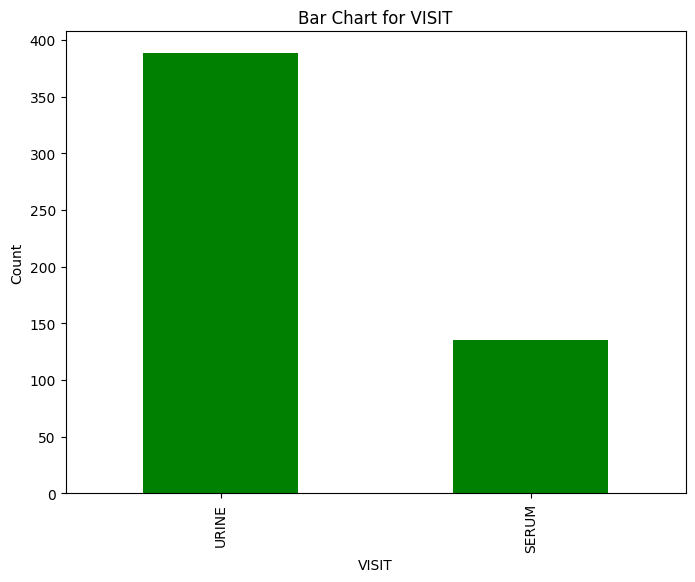

In [84]:
country = reproductive_system['RPSPEC'].dropna()

plt.figure(figsize=(8, 6))
country.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISIT')
plt.ylabel('Count')
plt.title('Bar Chart for VISIT')
plt.show()

Notes:
- we have 1658 females in the dataset, but 141 records in this file
- imputation for column RPSTRESC, RPORRES, RPSPEC (only 0.570342% missing)  
- add number of missing in the categorical variables??       
- RPDY (Study Day of Specimen Collection) has negative value -28 sometimes: what does that mean?
    - and how to analyse it
- RPSPEC very unbalanced
 

### 6. Subject Disease Milestones (sm.csv) - [One record per Disease Milestone per subject]

In [52]:
# Load subject disease milestones .csv file
file_path = 'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files/sm.csv'

# Create data frame
milestones = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'SMSEQ' columns in ascending order
milestones = milestones.sort_values(by=['USUBJID', 'SMSEQ'], ascending=True)
milestones

,STUDYID,DOMAIN,USUBJID,SMSEQ,SMSTDY,SMENDY,SMENRF,MIDS,MIDSTYPE
222,MSOAC,SM,MSOAC/0031,1,268.0,279.0,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
57,MSOAC,SM,MSOAC/0031,2,814.0,NaN,NaN,MS RELAPSE 2,MULTIPLE SCLEROSIS RELAPSE EVENT
683,MSOAC,SM,MSOAC/0035,1,144.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
421,MSOAC,SM,MSOAC/0035,2,221.0,NaN,NaN,MS RELAPSE 2,MULTIPLE SCLEROSIS RELAPSE EVENT
1287,MSOAC,SM,MSOAC/0044,1,414.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
...,...,...,...,...,...,...,...,...,...
797,MSOAC,SM,MSOAC/9995,1,142.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
996,MSOAC,SM,MSOAC/9995,2,555.0,NaN,NaN,MS RELAPSE 2,MULTIPLE SCLEROSIS RELAPSE EVENT
1039,MSOAC,SM,MSOAC/9998,1,79.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
272,MSOAC,SM,MSOAC/9999,1,69.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT


Number of patients

In [53]:
unique_count = milestones['USUBJID'].nunique()
print(f"The number of unique values in USUBJID: {unique_count}")

The number of unique values in USUBJID: 853


Check how many missing values per column

In [54]:
missing_percentage_sm = (milestones.isnull().sum() / len(milestones)) * 100
missing_milestones = pd.DataFrame({'Column Name': missing_percentage_sm.index, 'Missing Percentage': missing_percentage_sm.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_milestones)

  Column Name  Missing Percentage
0     STUDYID            0.000000
1      DOMAIN            0.000000
2     USUBJID            0.000000
3       SMSEQ            0.000000
4      SMSTDY            1.989390
5      SMENDY           57.294430
6      SMENRF           99.469496
7        MIDS            0.000000
8    MIDSTYPE            0.000000


Drop column with more than 90% and others, namely:
- **STUDYID**: Study Identifier (irrelevant)
- **DOMAIN**: Domain Abbreviation (irrelevant)
- **SMSEQ**: Sequence Number (gives same info as MIDS, in this dataset it does not add anything)
- **SMENRF**: Study Day of End of Milestone (almost all missing, but should I leave it the dataset?) !!!!!!
- **MIDSTYPE**: Disease Milestone Type (gives same info as MIDS)

In [55]:
columns_to_drop = ['STUDYID','DOMAIN','SMSEQ','SMENRF','MIDSTYPE']
milestones = milestones.drop(columns_to_drop, axis=1)
milestones

,USUBJID,SMSTDY,SMENDY,MIDS
222,MSOAC/0031,268.0,279.0,MS RELAPSE 1
57,MSOAC/0031,814.0,NaN,MS RELAPSE 2
683,MSOAC/0035,144.0,NaN,MS RELAPSE 1
421,MSOAC/0035,221.0,NaN,MS RELAPSE 2
1287,MSOAC/0044,414.0,NaN,MS RELAPSE 1
...,...,...,...,...
797,MSOAC/9995,142.0,NaN,MS RELAPSE 1
996,MSOAC/9995,555.0,NaN,MS RELAPSE 2
1039,MSOAC/9998,79.0,NaN,MS RELAPSE 1
272,MSOAC/9999,69.0,NaN,MS RELAPSE 1


- Descriptive statistics for continuous variables (SMSTDY)

In [56]:
continuous_columns_ms = ['SMSTDY','SMENDY']

descriptive_continuous_ms = {
    'Count': milestones[continuous_columns_ms].count(), #cases that are not missing
    'Missing Cases': milestones[continuous_columns_ms].isna().sum(),
    'Mean': milestones[continuous_columns_ms].mean(),
    'Standard Deviation': milestones[continuous_columns_ms].std()
}

cont_milestones = pd.DataFrame(descriptive_continuous_ms)
print(cont_milestones)

        Count  Missing Cases        Mean  Standard Deviation
SMSTDY   1478             30  395.510149          303.959886
SMENDY    644            864  338.309006          223.011404


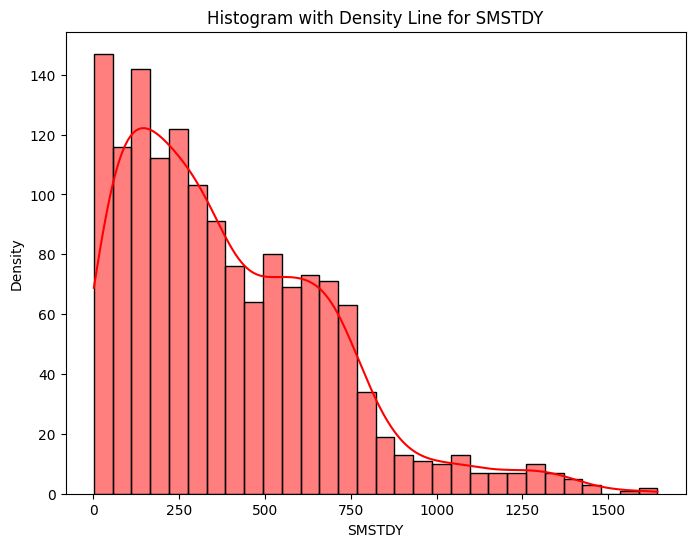

In [58]:
SMSTDY = milestones['SMSTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(SMSTDY, kde=True, color='red', bins=30)
plt.xlabel('SMSTDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for SMSTDY')
plt.show() # more or less normaly distributed

In [60]:
summary_stats = SMSTDY.describe()
summary_stats

count    1478.000000
mean      395.510149
std       303.959886
min         1.000000
25%       153.000000
50%       327.000000
75%       591.000000
max      1644.000000
Name: SMSTDY, dtype: float64

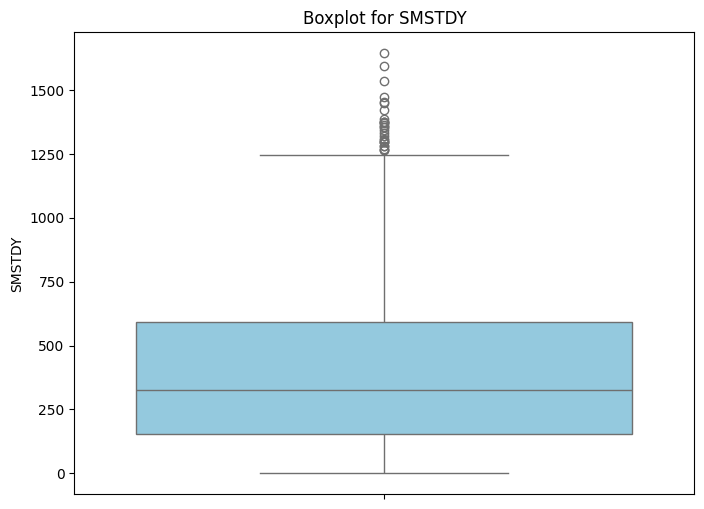

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=SMSTDY, color='skyblue')
plt.ylabel('SMSTDY')
plt.title('Boxplot for SMSTDY')
plt.show()

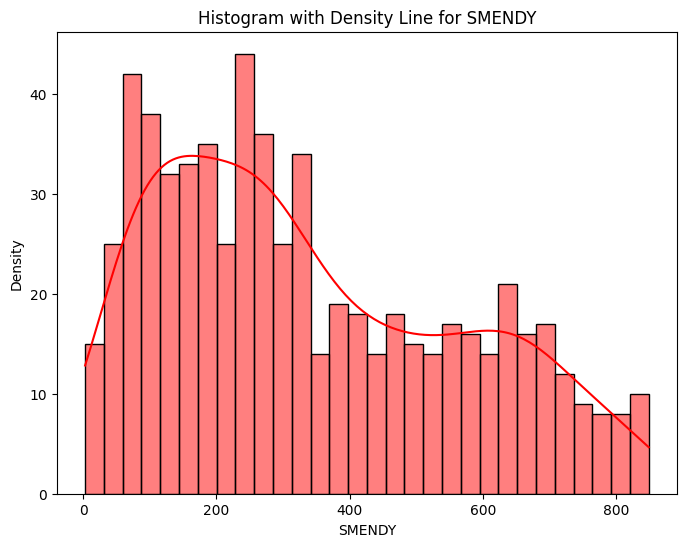

In [59]:
SMENDY = milestones['SMENDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(SMENDY, kde=True, color='red', bins=30)
plt.xlabel('SMENDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for SMENDY')
plt.show() # more or less normaly distributed

In [61]:
summary_stats = SMENDY.describe()
summary_stats

count    644.000000
mean     338.309006
std      223.011404
min        3.000000
25%      154.750000
50%      282.500000
75%      511.000000
max      849.000000
Name: SMENDY, dtype: float64

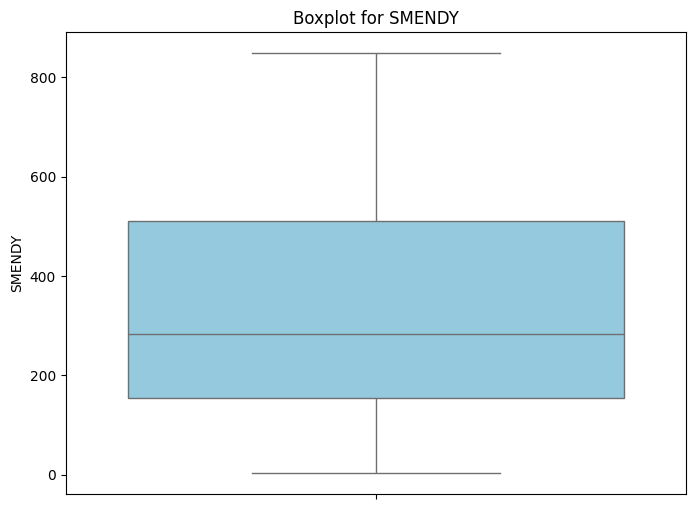

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=SMENDY, color='skyblue')
plt.ylabel('SMENDY')
plt.title('Boxplot for SMENDY')
plt.show()

- Descriptive statistics for categorical variables

In [57]:
categorical_columns_ms = ['MIDS']

descriptive_categorical_ms = {}
for col in categorical_columns_ms:
    descriptive_categorical_ms[col] = {
        'Count': milestones[col].count(),
        'Missing Cases': milestones[col].isna().sum(),
        'Unique Values': milestones[col].nunique(),
        'Mode': milestones[col].mode().values[0],
        'Mode Frequency': milestones[col].value_counts().max()
    }

cat_milestones = pd.DataFrame(descriptive_categorical_ms).T
print(cat_milestones)

     Count Missing Cases          Mode Mode Frequency Unique Values
MIDS  1508             0  MS RELAPSE 1            853             9


- number of observations for each MIDS category

In [66]:
# MIDS
mids_counts_milestones = milestones['MIDS'].value_counts().reset_index()
mids_counts_milestones.columns = ['MIDS', 'Count']
total_count = mids_counts_milestones['Count'].sum()
mids_counts_milestones['Percentage'] = (mids_counts_milestones['Count'] / total_count) * 100
print(mids_counts_milestones)

           MIDS  Count  Percentage
0  MS RELAPSE 1    853   56.564987
1  MS RELAPSE 2    368   24.403183
2  MS RELAPSE 3    157   10.411141
3  MS RELAPSE 4     75    4.973475
4  MS RELAPSE 5     36    2.387268
5  MS RELAPSE 6     14    0.928382
6  MS RELAPSE 7      3    0.198939
7  MS RELAPSE 8      1    0.066313
8  MS RELAPSE 9      1    0.066313


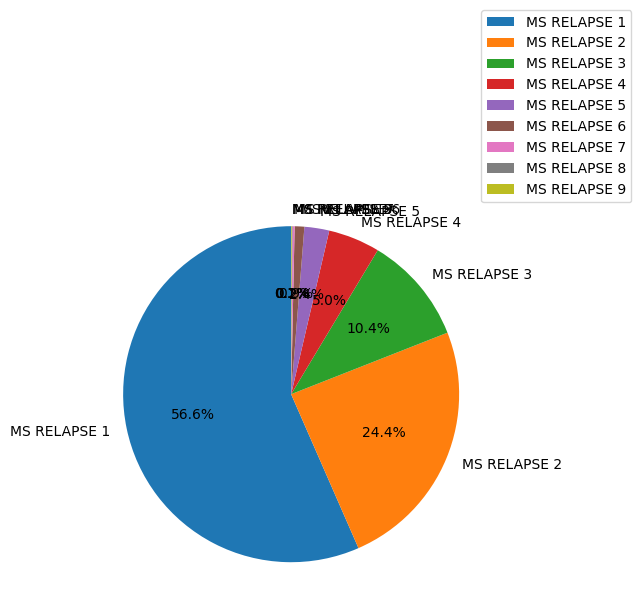

In [65]:
# Pie chart - dropped NA for now
categories = milestones['MIDS'].dropna().unique()
category_counts = milestones['MIDS'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

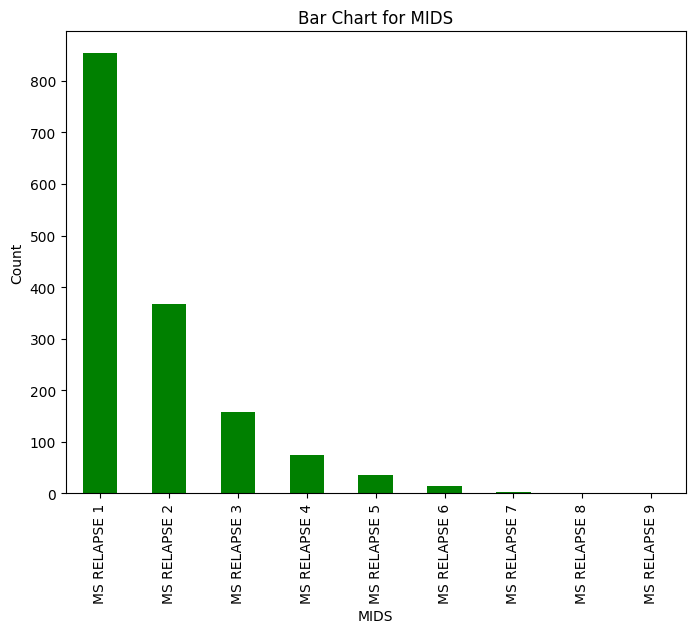

In [67]:
MIDS = milestones['MIDS'].dropna()

plt.figure(figsize=(8, 6))
MIDS.value_counts().plot(kind='bar', color='green')
plt.xlabel('MIDS')
plt.ylabel('Count')
plt.title('Bar Chart for MIDS')
plt.show()

Notes:
- should I do statistics for each patient individually?

---

# Notes

- we can merge the datasets by the column 'USUBJID'
- for Clinical Events dataset (ce.csv): column CETERM is not consistent - we have 'MS RELAPSE', 'MS - RELAPSE', 'RELAPSE OF MULTIPLE SCLEROSIS', etc. and all mean the same 
- clinical events and medical history datasets are the ones that give more work to understand and organize

#### Datasets by relevance

- High: demographics (dm), subject disease milestones (ms)
- Medium:
- Low: